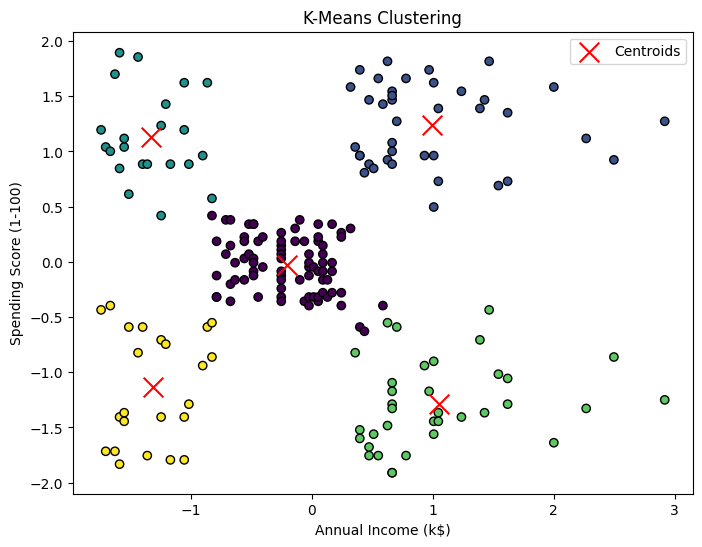

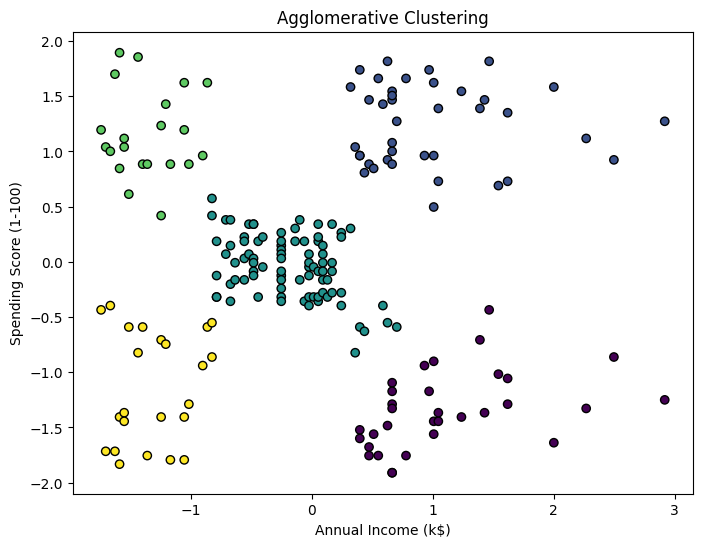

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features: 'Annual Income (k$)' & 'Spending Score (1-100)'
X = df.iloc[:, [3, 4]].values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1 K-Means Clustering
def kmeans_clustering(X, n_clusters=5):  # Choose K based on Elbow
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return labels, kmeans.cluster_centers_

# 2 Agglomerative Clustering
def agglomerative_clustering(X, n_clusters=5):  # Choose K based on Dendrogram
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(X)
    return labels

# Function to plot clusters
def plot_clusters(X, labels, centers=None, title="Clustering Results"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.title(title)
    if centers is not None:
        plt.legend()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Step 1: K-Means Clustering
    kmeans_labels, kmeans_centers = kmeans_clustering(X_scaled)
    plot_clusters(X_scaled, kmeans_labels, kmeans_centers, "K-Means Clustering")

    # Step 2: Agglomerative Clustering
    agglo_labels = agglomerative_clustering(X_scaled)
    plot_clusters(X_scaled, agglo_labels, title="Agglomerative Clustering")
